In [20]:
import numpy as np 
import matplotlib.pyplot as plt

In [21]:

num_correct1 = []
num_correct2 = []

for seed in range(4):
    num_correct1.append((np.load(f"ckpts/gsm8k_all_2epochs_llama2/train_aug_1_answer_types5_seed{seed}.npy")==0).sum(axis=-1))
    num_correct2.append((np.load(f"ckpts/gsm8k_all_2epochs_llama2/train_aug_2_answer_types5_seed{seed}.npy")==0).sum(axis=-1))

    
num_correct1 = np.sum(num_correct1, axis=0)
num_correct2 = np.sum(num_correct2, axis=0)
num_correct = np.concatenate([num_correct1, num_correct2])

In [22]:

num_correct1_old = []
num_correct2_old = []

for seed in range(4):
    num_correct1_old.append((np.load(f"/data/katie_kang/stanford_alpaca/GSM8K_AUG/train_part1_answer_types5_seed{seed}.npy")==0).sum(axis=-1))
    num_correct2_old.append((np.load(f"/data/katie_kang/stanford_alpaca/GSM8K_AUG/train_part2_answer_types5_seed{seed}.npy")==0).sum(axis=-1))

    
num_correct1_old = np.sum(num_correct1_old, axis=0)
num_correct2_old = np.sum(num_correct2_old, axis=0)
num_correct_old = np.concatenate([num_correct1_old, num_correct2_old])

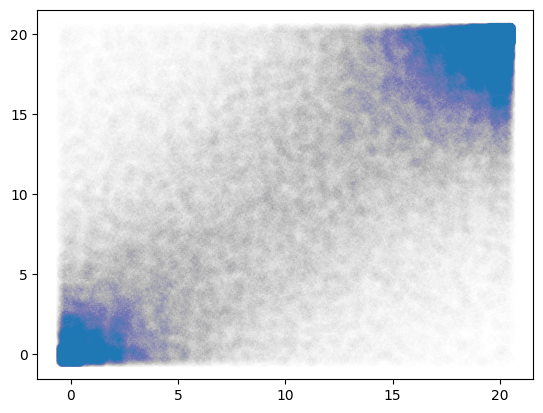

In [15]:
plt.scatter(num_correct_old+np.random.uniform(-0.5, 0.5, len(num_correct_old)), num_correct+np.random.uniform(-0.5, 0.5, len(num_correct_old)), alpha=0.005)

In [24]:
num_correct_test_old = (np.load("ckpts/gsm8k_full_orig_test_answer_types20_seed0.npy")==0).sum(axis=-1)

num_correct_test = (np.load("ckpts/gsm8k_all_2epochs_llama2/test_answer_types20_seed0.npy")==0).sum(axis=-1)



# num_correct_test = []

# for seed in range(4):
#     num_correct_test.append((np.load(f"ckpts/gsm8k_all_2epochs_llama2/test_answer_types5_seed{seed}.npy")==0).sum(axis=-1))

    
# num_correct_test = np.sum(num_correct_test, axis=0)

(array([588., 121., 125.,  77.,  73.,  72.,  67.,  62.,  64.,  70.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

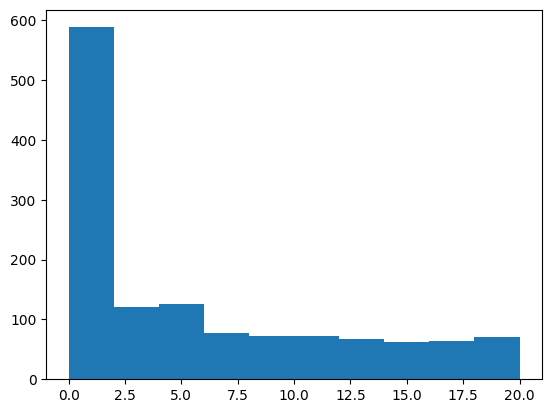

In [5]:
plt.hist(num_correct_test_old)

(array([ 76.,  57.,  50.,  66.,  55.,  70.,  74., 118., 151., 602.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

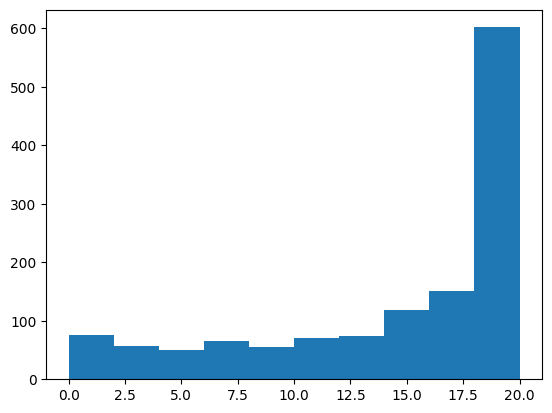

In [4]:
plt.hist(num_correct_test)

Text(0.5, 1.0, 'GSM8k test')

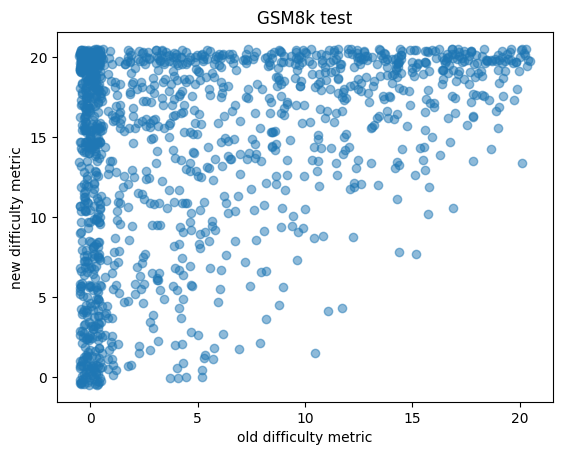

In [27]:
plt.scatter(num_correct_test_old+np.random.uniform(-0.5, 0.5, len(num_correct_test)), num_correct_test+np.random.uniform(-0.5, 0.5, len(num_correct_test)), alpha=0.5)

plt.xlabel("old difficulty metric")
plt.ylabel("new difficulty metric")
plt.title("GSM8k test")

In [60]:
num_correct[np.where(num_correct<5)[0]].mean()

1.3587768595041323

In [61]:
num_correct[np.where(num_correct<10)[0]].mean()

3.4056647447498003

In [25]:
(num_correct<5).sum()/(num_correct<10).sum()

0.6365472833634948

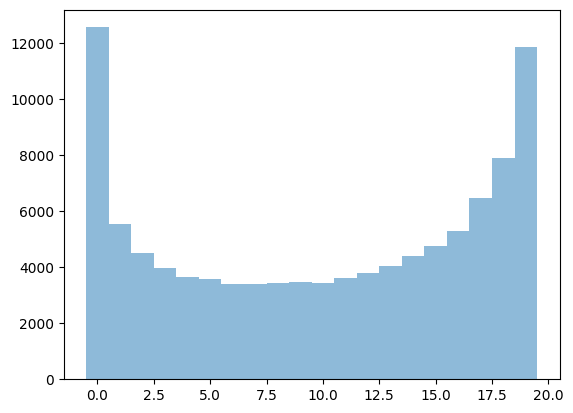

In [64]:
# plt.hist(num_correct)
plt.hist(num_correct, bins=np.array(range(0, 21))-0.5, alpha=0.5, label="train")
plt.savefig("delete.png")

In [27]:

num_correct_test = []

for seed in range(4):
    num_correct_test.append((np.load(f"ckpts/gsm8k_all_2epochs_llama2/test_answer_types5_seed{seed}.npy")==0).sum(axis=-1))

    
num_correct_test = np.sum(num_correct_test, axis=0)

In [28]:
subsample_idxs = np.where(num_correct_test<5)[0]

test_accs = (np.load("ckpts/gsm8k_aug_llama2_rand_20000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()
# test_accs.mean()

0.35185185185185186

In [50]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard5", "hard10", "hard15", "rand"]:
    print(run_type)
    test_accs_seeds = []
    for seed in [2]:
        test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_5000/test_answer_types5_seed{str(seed)}.npy")==0).max(axis=-1)
        test_accs_seeds.append(test_accs[subsample_idxs].mean())
    print(np.mean(test_accs_seeds), np.std(test_accs_seeds))


hard5
0.30246913580246915 0.0
hard10
0.30246913580246915 0.0
hard15
0.3148148148148148 0.0
rand
0.3148148148148148 0.0


In [48]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard5", "hard10", "hard15", "rand"]:
    print(run_type)
    test_accs_seeds = []
    for seed in [0, 1, 2, 3, 4]:
        test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_20000/test_answer_types5_seed{str(seed)}.npy")==0).max(axis=-1)
        test_accs_seeds.append(test_accs[subsample_idxs].mean())
    print(np.mean(test_accs_seeds), np.std(test_accs_seeds))


hard5
0.35802469135802467 0.022764307301957745
hard10
0.39382716049382716 0.037119250316970144
hard15
0.3925925925925926 0.01771938283260163
rand
0.3382716049382716 0.008189197013223213


In [41]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard5", "hard10", "hard15", "rand"]:
    test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_20000/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    print(run_type, test_accs[subsample_idxs].mean())


hard5 0.13703703703703704
hard10 0.15061728395061727
hard15 0.1654320987654321
rand 0.1567901234567901


In [51]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard5", "hard10","rand"]:
    test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_30000/test_answer_types5_seed2.npy")==0).max(axis=-1)
    print(run_type, test_accs[subsample_idxs].mean())

hard5 0.35185185185185186
hard10 0.43209876543209874
rand 0.36419753086419754


In [45]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard5", "rand"]:
    test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_30000/test_answer_types5_seed0.npy")==0).max(axis=-1)
    print(run_type, test_accs[subsample_idxs].mean())

hard5 0.3271604938271605
rand 0.3888888888888889


In [33]:
subsample_idxs = np.where(num_correct_test<5)[0]
for run_type in ["hard5", "hard10", "hard15", "rand"]:
    test_accs = (np.load(f"ckpts/gsm8k_aug_llama2_{run_type}_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)
    print(run_type, test_accs[subsample_idxs].mean())


hard5 0.30246913580246915
hard10 0.30246913580246915
hard15 0.3148148148148148
rand 0.3148148148148148


In [29]:

test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard5_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

FileNotFoundError: [Errno 2] No such file or directory: '../ckpts/gsm8k_aug_llama2_hard5_5000/test_answer_types5_seed2.npy'

In [16]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_rand_20000/test_answer_types5_seed2.npy")==0).mean(axis=-1)

test_accs[subsample_idxs].mean()

0.15925925925925927

In [17]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard5_20000/test_answer_types5_seed2.npy")==0).mean(axis=-1)

test_accs[subsample_idxs].mean()

0.13209876543209875

In [23]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard10_20000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.4382716049382716

In [24]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard15_20000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.36419753086419754

In [20]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard5_30000/test_answer_types5_seed2.npy")==0).mean(axis=-1)

test_accs[subsample_idxs].mean()

0.15308641975308643

In [21]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_rand_30000/test_answer_types5_seed2.npy")==0).mean(axis=-1)

test_accs[subsample_idxs].mean()

0.1592592592592593

In [13]:
len(subsample_idxs)*0.1

16.2

In [125]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard15_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.4662379421221865

In [126]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard10_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.43729903536977494

In [131]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard5_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.30246913580246915

In [121]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard3_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.3148148148148148

In [122]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard2_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.2777777777777778

In [123]:
test_accs = (np.load("../ckpts/gsm8k_aug_llama2_hard_5000/test_answer_types5_seed2.npy")==0).max(axis=-1)

test_accs[subsample_idxs].mean()

0.22839506172839505

In [95]:
len(np.where(num_correct_test<2)[0])

70

In [ ]:
hard hard5 

hard10 hard15